# Prediction of the Age of Abalone

## Introduction

In this assignment, the target is to generate an unsupervised model of to predict the age of abalone based on the physical measurement. 
The problem is coming from the website https://www.kaggle.com/datasets/farkhod77/abalone-age-predict

In [192]:
import matplotlib.pylab as plt
import os
import natsort
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

1. A glance of the data

To have an initial impression of the data, load the data from csv file, print the basic information.
In the data frame, the number of rings represent the age.
The task is to build a model to use the other physical measurements to predict the rings(age).

In [193]:
input = pd.read_csv("data/abalone.data.csv")
print(input)
input.describe()

     gender  Length  Diameter  Height  Whole weight  Shucked weight  \
0         M   0.455     0.365   0.095        0.5140          0.2245   
1         M   0.350     0.265   0.090        0.2255          0.0995   
2         F   0.530     0.420   0.135        0.6770          0.2565   
3         M   0.440     0.365   0.125        0.5160          0.2155   
4         I   0.330     0.255   0.080        0.2050          0.0895   
...     ...     ...       ...     ...           ...             ...   
4172      F   0.565     0.450   0.165        0.8870          0.3700   
4173      M   0.590     0.440   0.135        0.9660          0.4390   
4174      M   0.600     0.475   0.205        1.1760          0.5255   
4175      F   0.625     0.485   0.150        1.0945          0.5310   
4176      M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Considering normally the different gender will have different pattern, to simplify the calculation, split the data to male and female respectively.

In [194]:
df_m = input[input['gender']=='M'].drop('gender',axis=1)
df_f = input[input['gender']=='F'].drop('gender',axis=1)

print(df_m.head())
print(df_f.head())

    Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0    0.455     0.365   0.095        0.5140          0.2245          0.1010   
1    0.350     0.265   0.090        0.2255          0.0995          0.0485   
3    0.440     0.365   0.125        0.5160          0.2155          0.1140   
8    0.475     0.370   0.125        0.5095          0.2165          0.1125   
11   0.430     0.350   0.110        0.4060          0.1675          0.0810   

    Shell weight  Rings  
0          0.150     15  
1          0.070      7  
3          0.155     10  
8          0.165      9  
11         0.135     10  
    Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
2    0.530     0.420   0.135        0.6770          0.2565          0.1415   
6    0.530     0.415   0.150        0.7775          0.2370          0.1415   
7    0.545     0.425   0.125        0.7680          0.2940          0.1495   
9    0.550     0.440   0.150        0.8945          0.3145     

2. Split the dataset to training/testing set

In [195]:
from sklearn.model_selection import train_test_split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    df_m[df_m.columns.difference(['Rings'])],    
    df_m['Rings'],
    train_size=0.75
)
X_train_f, X_test_f,y_train_f, y_test_f = train_test_split(
    df_f[df_m.columns.difference(['Rings'])],
    df_f['Rings'],
    train_size=0.75
)

ages_m = y_train_m.value_counts()
ages_f = y_train_f.value_counts()


To have better impression of the data, have a diagram to visualize the distribution of the ages and the potential pattern between ages and other biometrics.

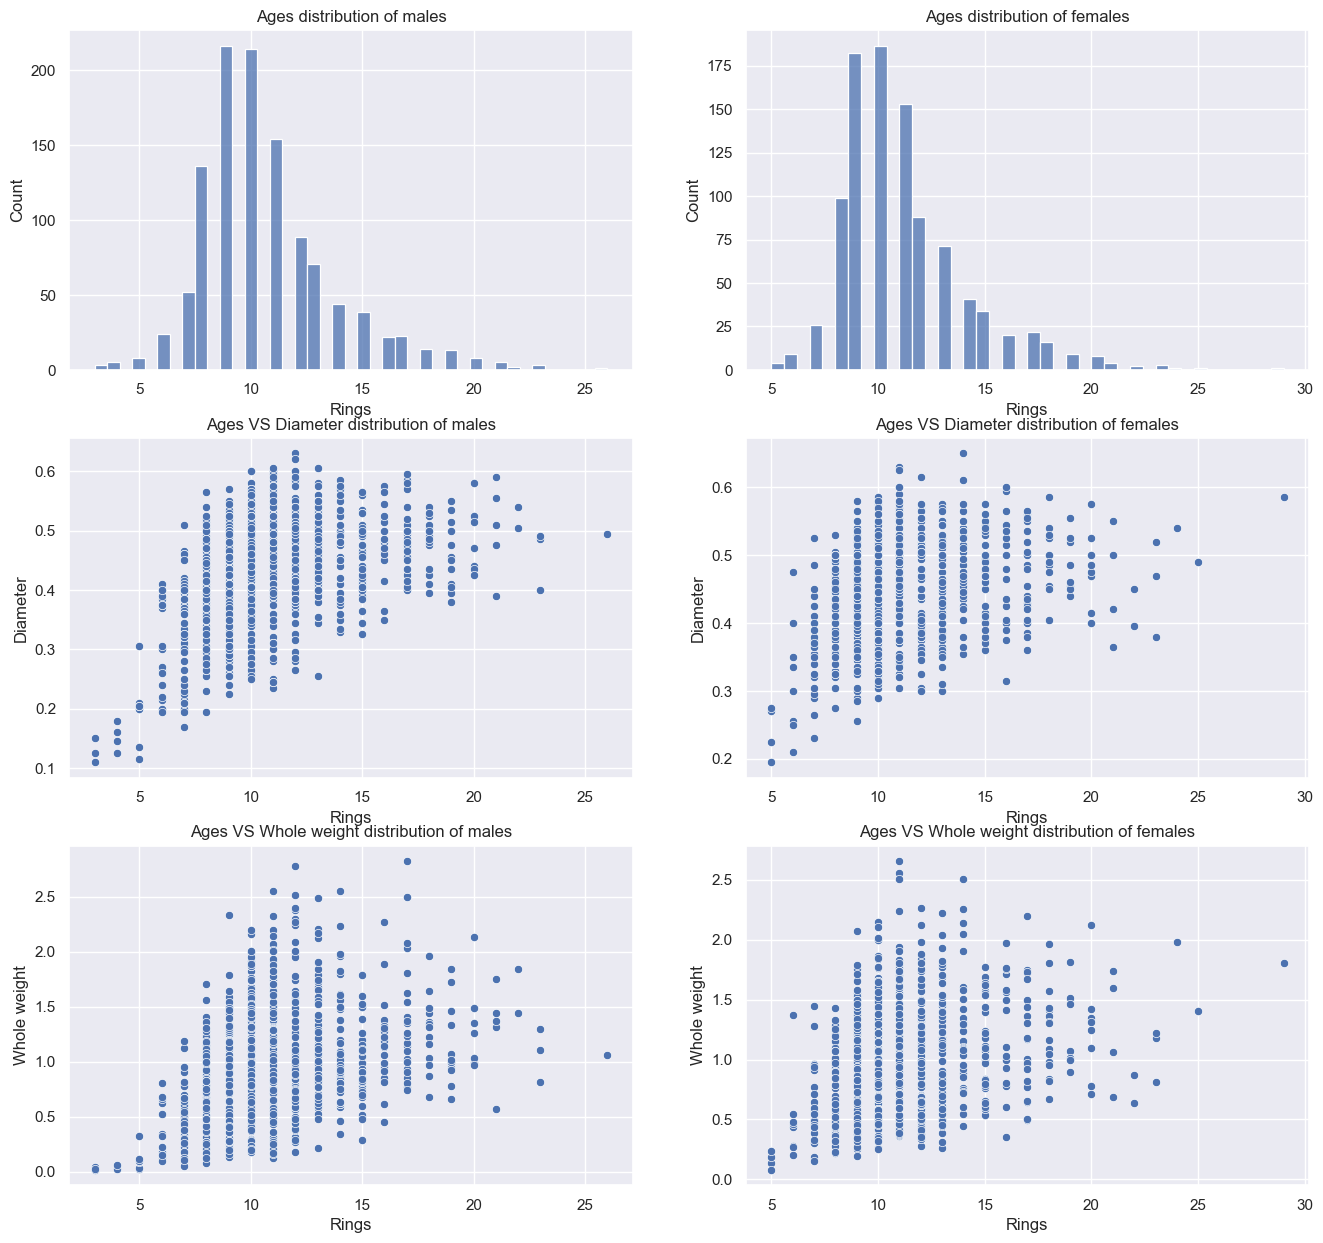

In [196]:
def dump_ages():
    fig, ax =plt.subplots(3,2,figsize = (16, 15))
    sns.histplot(y_train_m, ax=ax[0][0])
    sns.scatterplot(y = X_train_m['Diameter'], x = y_train_m, ax=ax[1][0])
    sns.scatterplot(y = X_train_m['Whole weight'], x = y_train_m, ax=ax[2][0])
    ax[0][0].set_title("Ages distribution of males")
    ax[1][0].set_title("Ages VS Diameter distribution of males")
    ax[2][0].set_title("Ages VS Whole weight distribution of males")
    sns.histplot(y_train_f, ax=ax[0][1])
    sns.scatterplot(y = X_train_f['Diameter'], x = y_train_f, ax=ax[1][1])
    sns.scatterplot(y = X_train_f['Whole weight'], x = y_train_f, ax=ax[2][1])
    ax[0][1].set_title("Ages distribution of females")
    ax[1][1].set_title("Ages VS Diameter distribution of females")
    ax[2][1].set_title("Ages VS Whole weight distribution of females")
    plt.show() 
    

dump_ages()

We can get some information from the diagrams
1. Most of the abalones are in the ages between 6 and 15, the number of that are younger than 6 and elder than 15 is not much.
2. The size and the weight, both are distributed widely, they are not very tight to the ages. In fact, the two factors have some kind of dependency. To have further look at the correlations, check the correlation matrix.

3. Group the data

Since the number of data may not be sufficient to be used to predict this kind of prediction (some ages may only have 1 or 2 instances), instead of predict the exact age, I'm grouping the age to fewer groups, the model will be used to predict the age group.

4 groups are defined for the purpose as below:
1->[0,8], 2->(8,10], 3->(10,12], 4->(12,]


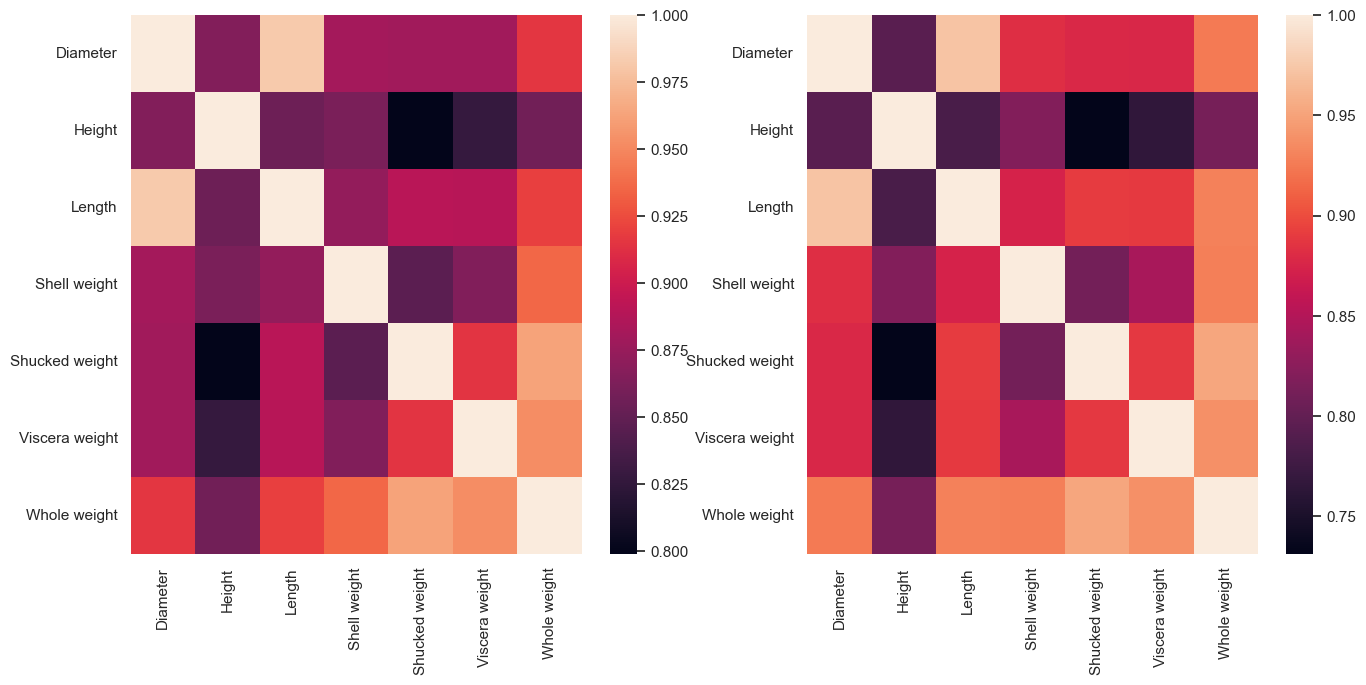

In [197]:
corr_m = X_train_m.corr()
corr_f = X_train_f.corr()

fig, ax =plt.subplots(1,2,figsize = (16, 7))
sns.heatmap(corr_m, ax=ax[0])
sns.heatmap(corr_f, ax=ax[1])
plt.show() 



From the correlation map, the association between the features is a bit high.

In [198]:
def age2group(df):
    top = df.max()
    df[df<=8] = top+1
    df[df<=10] = top+2
    df[df<=12] = top+3
    df[df<=top] = top+4
    df = df-top
    return df
    
y_train_m_group = age2group(y_train_m.copy())
y_train_f_group = age2group(y_train_f.copy())
y_test_m_group = age2group(y_test_m.copy())
y_test_f_group = age2group(y_test_f.copy())

Check the distribution after grouping further.

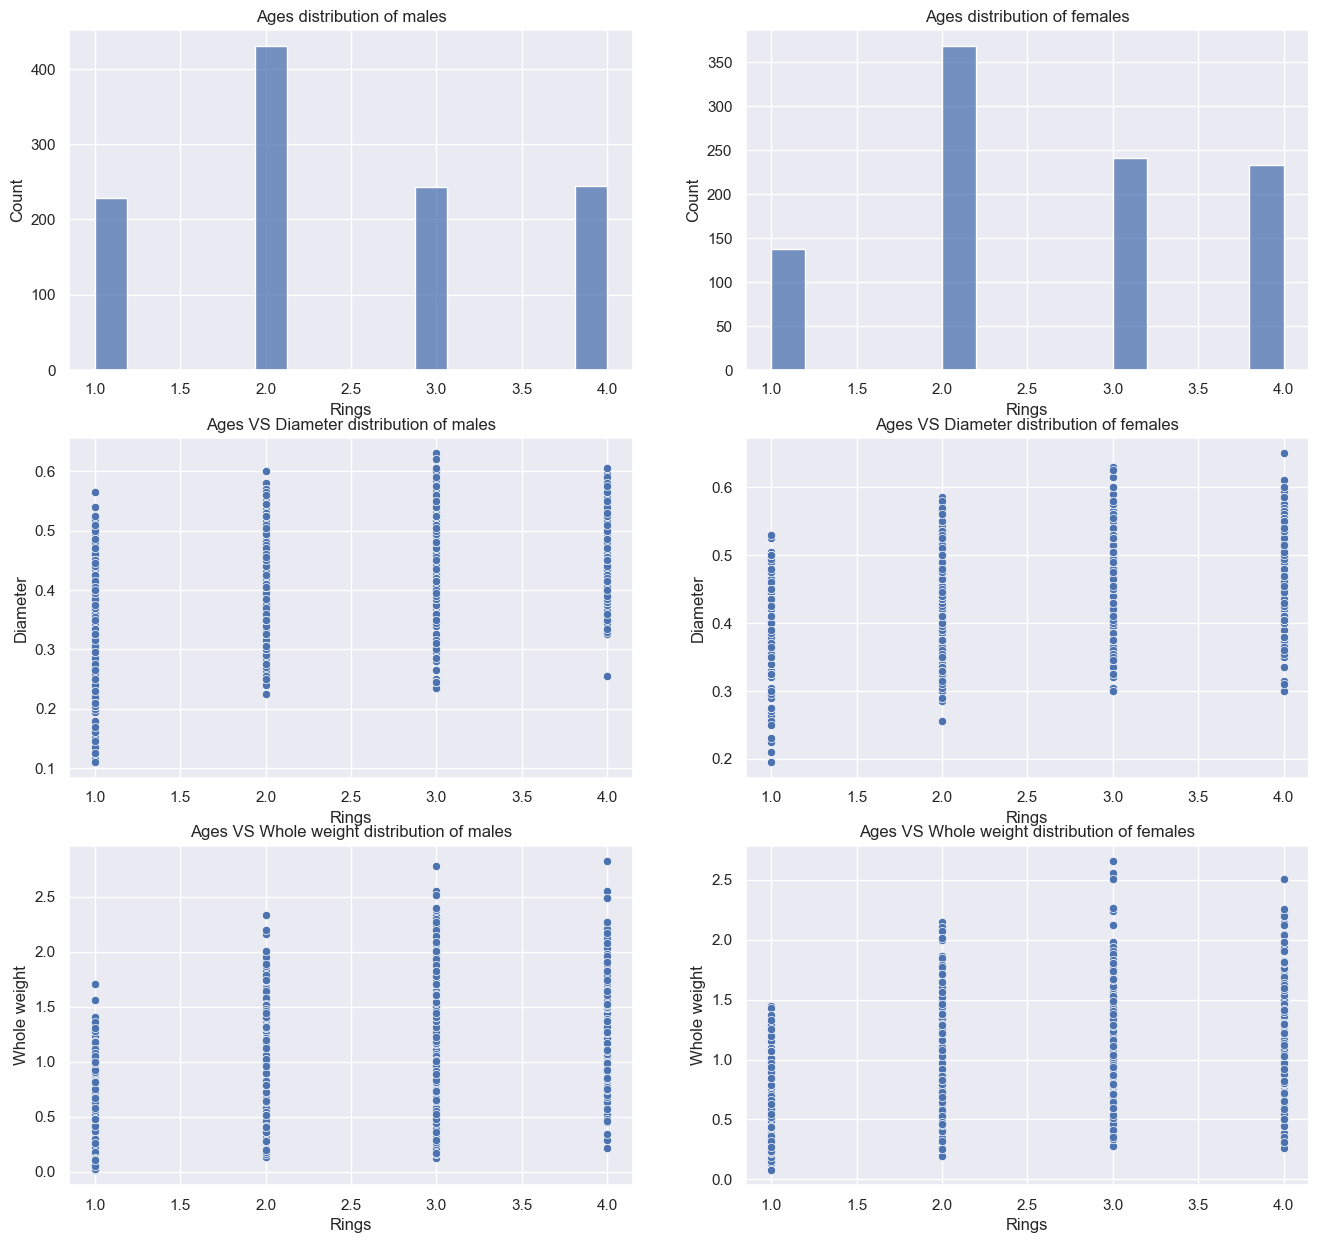

In [199]:
def dump_groups():
    fig, ax =plt.subplots(3,2,figsize = (16, 15))
    sns.histplot(y_train_m_group, ax=ax[0][0])
    sns.scatterplot(y = X_train_m['Diameter'], x = y_train_m_group, ax=ax[1][0])
    sns.scatterplot(y = X_train_m['Whole weight'], x = y_train_m_group, ax=ax[2][0])
    ax[0][0].set_title("Ages distribution of males")
    ax[1][0].set_title("Ages VS Diameter distribution of males")
    ax[2][0].set_title("Ages VS Whole weight distribution of males")
    sns.histplot(y_train_f_group, ax=ax[0][1])
    sns.scatterplot(y = X_train_f['Diameter'], x = y_train_f_group, ax=ax[1][1])
    sns.scatterplot(y = X_train_f['Whole weight'], x = y_train_f_group, ax=ax[2][1])
    ax[0][1].set_title("Ages distribution of females")
    ax[1][1].set_title("Ages VS Diameter distribution of females")
    ax[2][1].set_title("Ages VS Whole weight distribution of females")
    plt.show() 
    

dump_groups()

3. Build Classify model

Base on the initial analysis, there are some dependent features in the original dataset, so we will apply PCA model trying to extract the primary features firstly, then a prediction model with KNN clustering algorithm is applied to build the final classifier.

In [200]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
class AgeGroupPredictorKNN:
    def __init__(self):
        self.n_components = 5
        self.max_iter = 10000
        self.n_init = 100


        self.pca = None
        self.knn = None
        self.X_pca = None
        self.label2group = []
    def with_params(self, params):
        if params == None:
            return self
        for k in params:
            match k:
                case 'n_components':
                    self.n_components = params[k]  
                case 'n_init':
                    self.n_init = params[k]
                case 'max_iter':
                    self.max_iter = params[k]                  
        return self

    def fit(self,X,y):
        self.pca = PCA(n_components=self.n_components).fit(X)
        self.X_pca = self.pca.transform(X)

        n_clusters = len(y.unique())
        self.knn = KMeans(
            n_clusters=n_clusters,  
            n_init=self.n_init,
            max_iter=self.max_iter,
        ).fit(self.X_pca)

        self.map_label_to_group(y)
        
    def map_label_to_group(self,y):
        groups = itertools.permutations(y.unique())
        best_score = 0
        l = self.knn.labels_
        for g in groups:
            yp = [g[l[i]] for i in range(len(l))]
            sc = self.score(y, yp)
            if (sc > best_score):
                best_score = sc
                self.label2group = g

    def predict(self, X):
        x_pca = self.pca.transform(X)
        l = self.knn.predict(x_pca)
        g = self.label2group
        yp = [g[l[i]] for i in range(len(l))]
        return pd.DataFrame(yp)

    def score(self, y_true, y_predict):
        return accuracy_score(y_true, y_predict)

    def confusion_matrix(self, y_true, y_predict):
        return confusion_matrix(y_true, y_predict)

4. Verify the model

In [201]:
from sklearn.metrics import ConfusionMatrixDisplay


def visualize_test(clf:AgeGroupPredictorKNN,cm):
    fig, ax =plt.subplots(1,2,figsize = (16, 6))
    corr = pd.DataFrame(clf.X_pca).corr()
    sns.heatmap(corr, ax=ax[0])
    ax[0].set_title("Correlation Matrix")
    ax[1].set_title("Confusion matrix")
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax[1])
    plt.show() 

    


Prediction for males:
Parameters: {'n_components': 5, 'n_init': 10, 'max_iter': 1000} Score: 0.3481675392670157 
Confusion matrix:
 [[33  2  1 35]
 [22 52  6 62]
 [ 7 44 21 28]
 [ 6 28  8 27]]


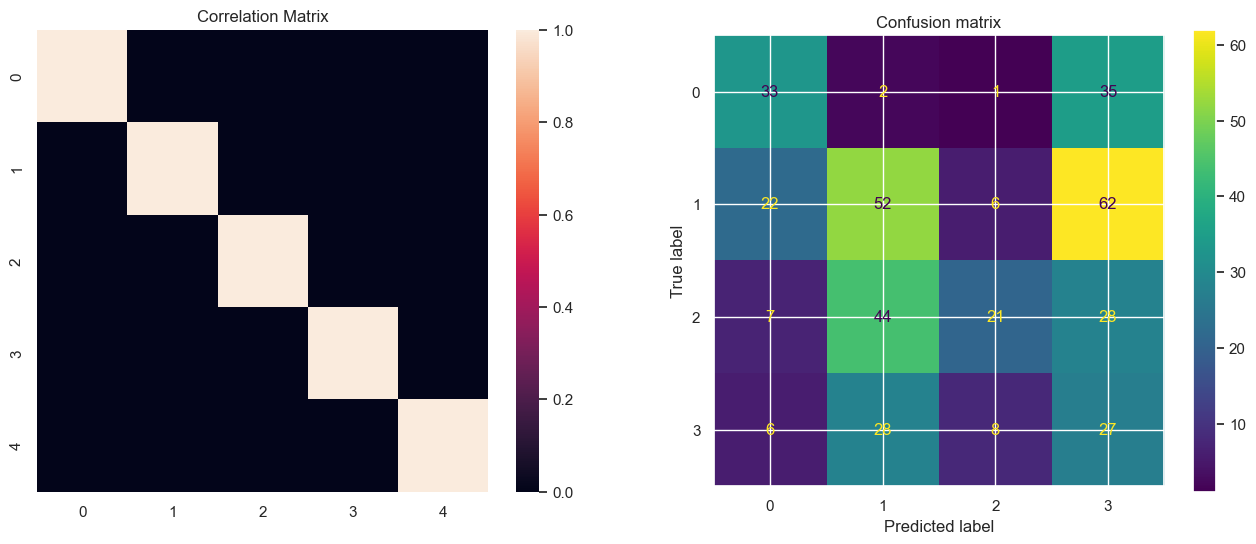

Parameters: {'n_components': 5, 'n_init': 100, 'max_iter': 2000} Score: 0.3481675392670157 
Confusion matrix:
 [[33  2  1 35]
 [22 52  6 62]
 [ 7 44 21 28]
 [ 6 28  8 27]]


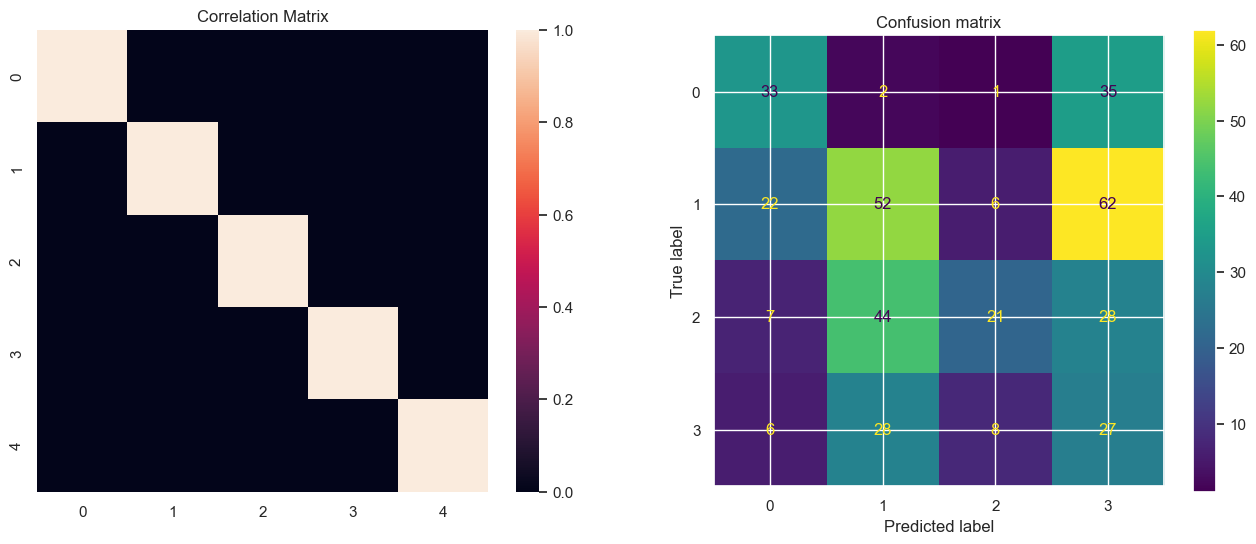

Parameters: {'n_components': 3, 'n_init': 500, 'max_iter': 5000} Score: 0.3481675392670157 
Confusion matrix:
 [[33  2  1 35]
 [22 52  6 62]
 [ 7 44 21 28]
 [ 6 28  8 27]]


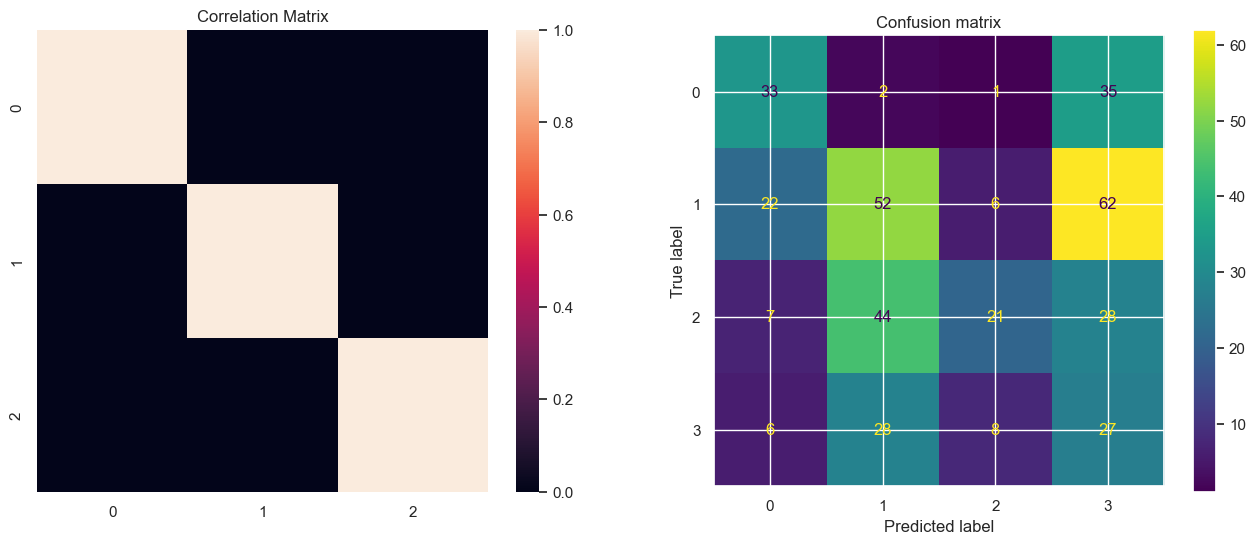

Parameters: {'n_components': 6, 'n_init': 100, 'max_iter': 3000} Score: 0.3481675392670157 
Confusion matrix:
 [[33  2  1 35]
 [22 52  6 62]
 [ 7 44 21 28]
 [ 6 28  8 27]]


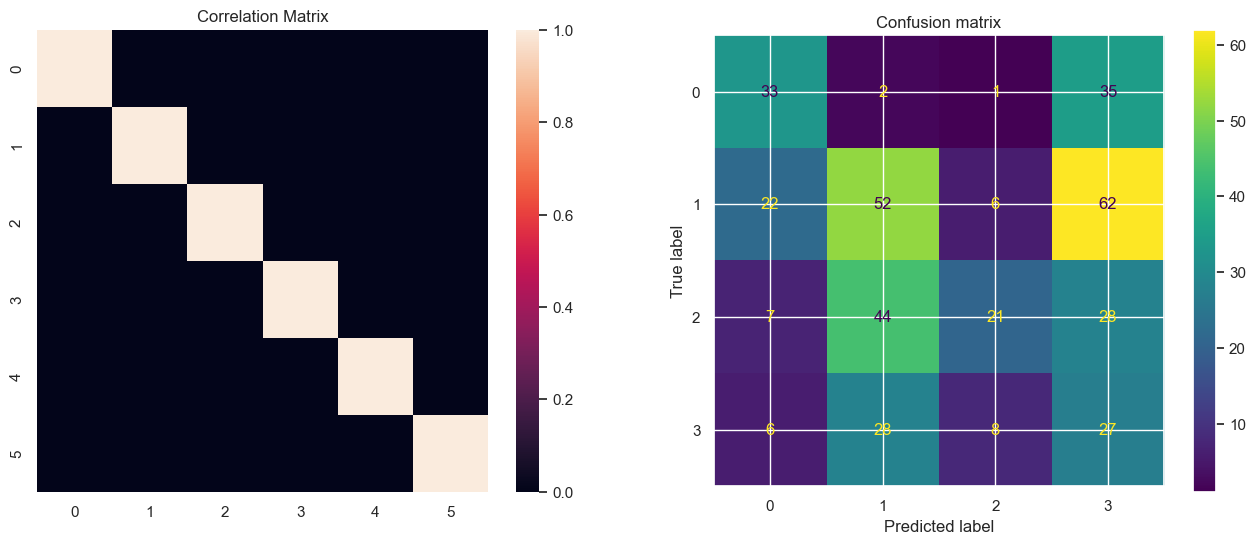

Parameters: {'n_components': 4, 'n_init': 100, 'max_iter': 3000} Score: 0.3481675392670157 
Confusion matrix:
 [[33  2  1 35]
 [22 52  6 62]
 [ 7 44 21 28]
 [ 6 28  8 27]]


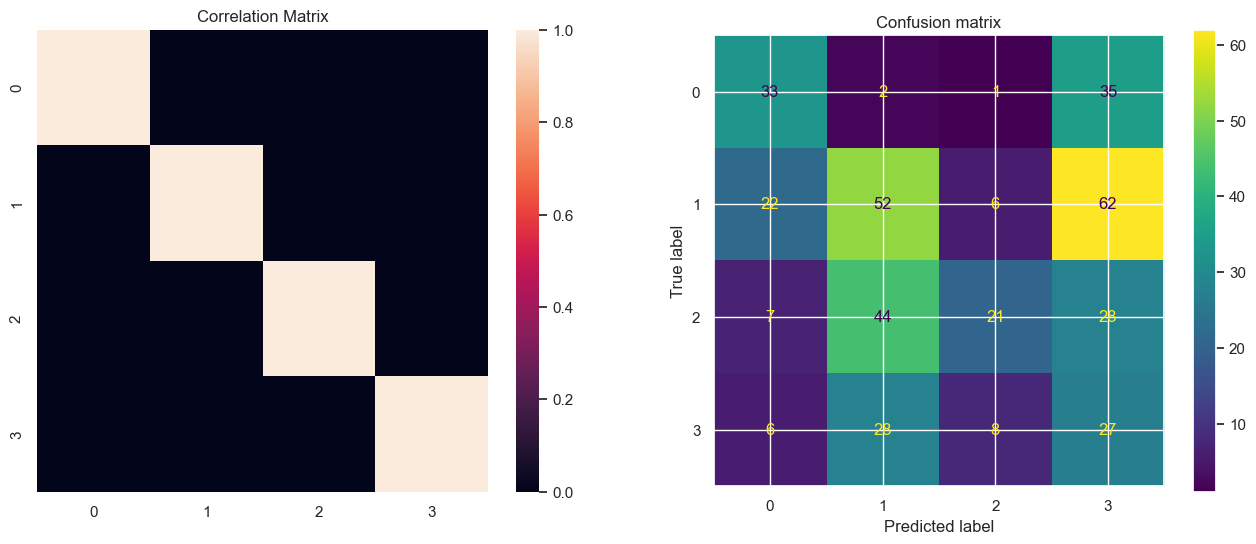

Prediction for females:
Parameters: {'n_components': 5, 'n_init': 10, 'max_iter': 1000} Score: 0.3119266055045872 
Confusion matrix:
 [[24  5  0 19]
 [31 32  9 46]
 [ 7 34 17 29]
 [13 19 13 29]]


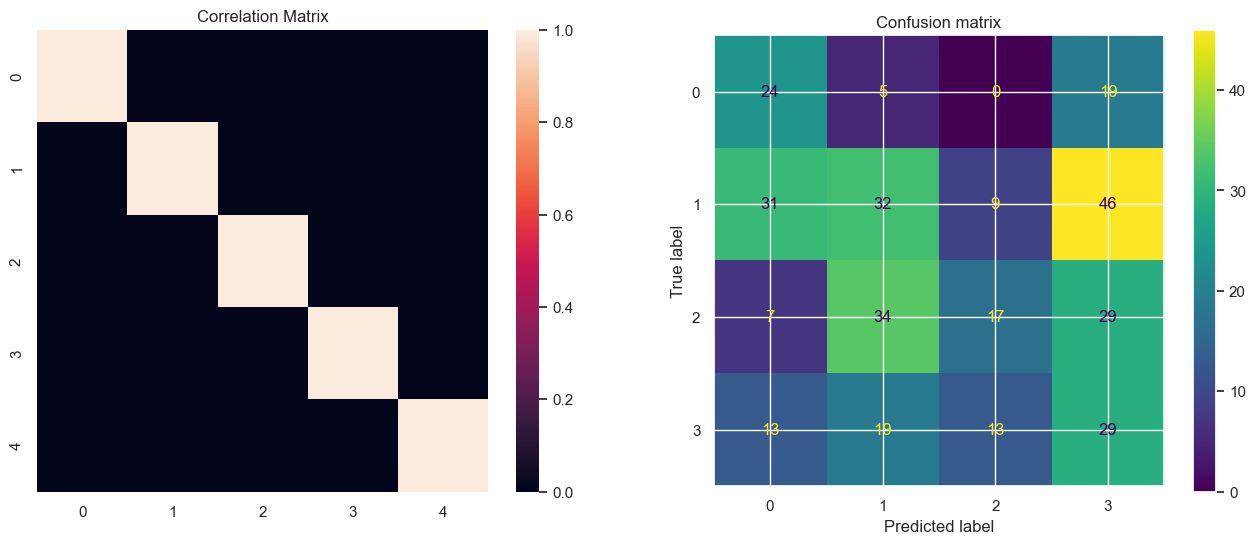

Parameters: {'n_components': 5, 'n_init': 100, 'max_iter': 2000} Score: 0.327217125382263 
Confusion matrix:
 [[24  5  0 19]
 [31 37  9 41]
 [ 7 36 17 27]
 [13 18 14 29]]


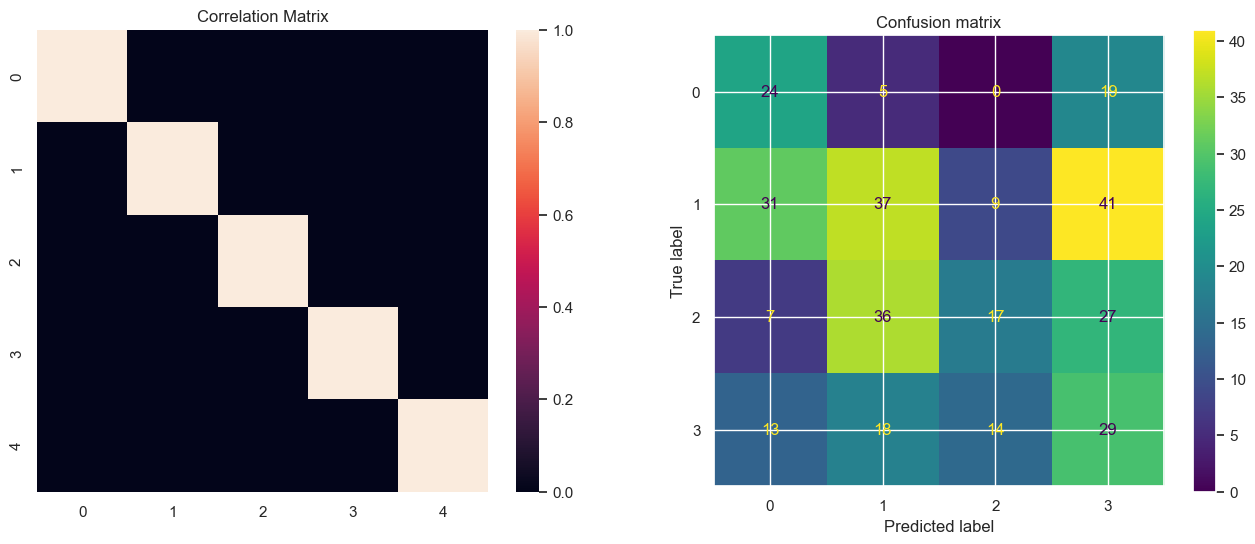

Parameters: {'n_components': 3, 'n_init': 500, 'max_iter': 5000} Score: 0.327217125382263 
Confusion matrix:
 [[24  5  0 19]
 [31 37  9 41]
 [ 7 36 17 27]
 [13 18 14 29]]


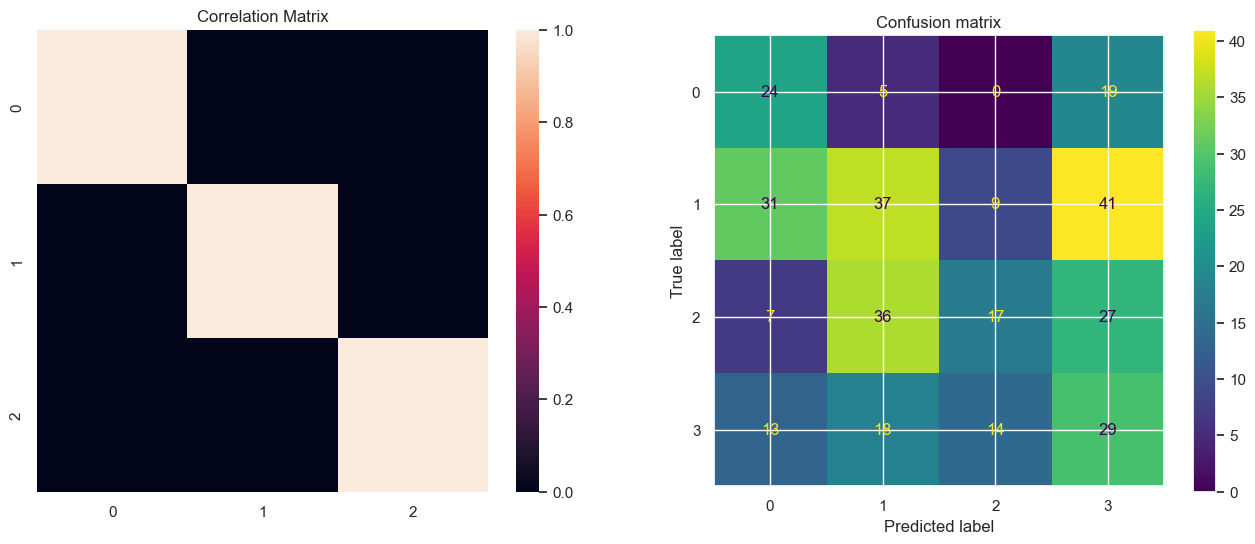

Parameters: {'n_components': 6, 'n_init': 100, 'max_iter': 3000} Score: 0.327217125382263 
Confusion matrix:
 [[24  5  0 19]
 [31 37  9 41]
 [ 7 36 17 27]
 [13 18 14 29]]


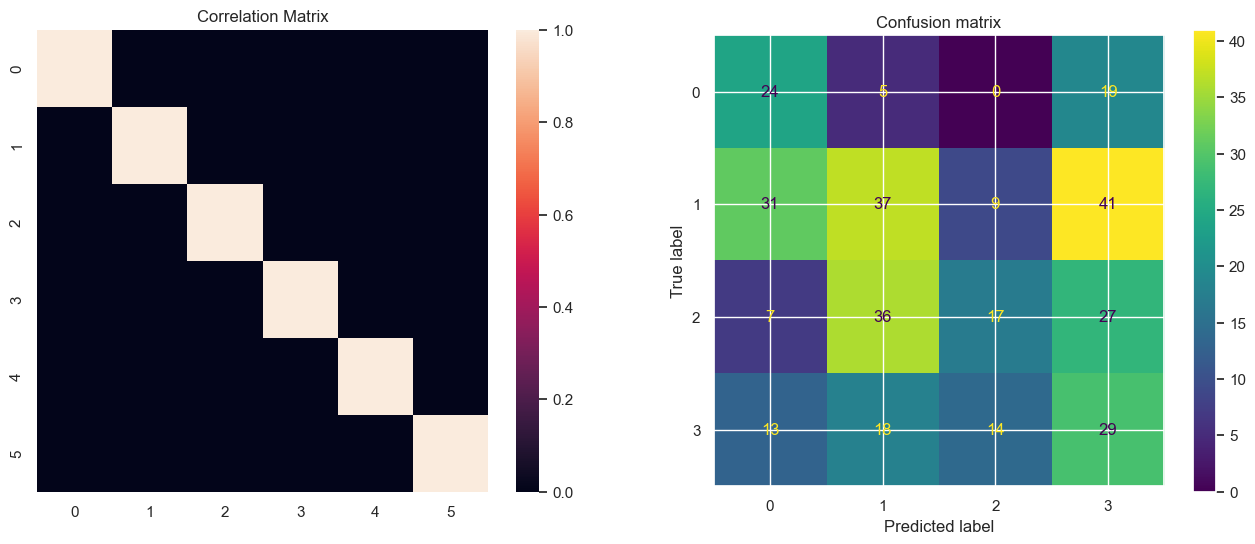

Parameters: {'n_components': 4, 'n_init': 100, 'max_iter': 3000} Score: 0.327217125382263 
Confusion matrix:
 [[24  5  0 19]
 [31 37  9 41]
 [ 7 36 17 27]
 [13 18 14 29]]


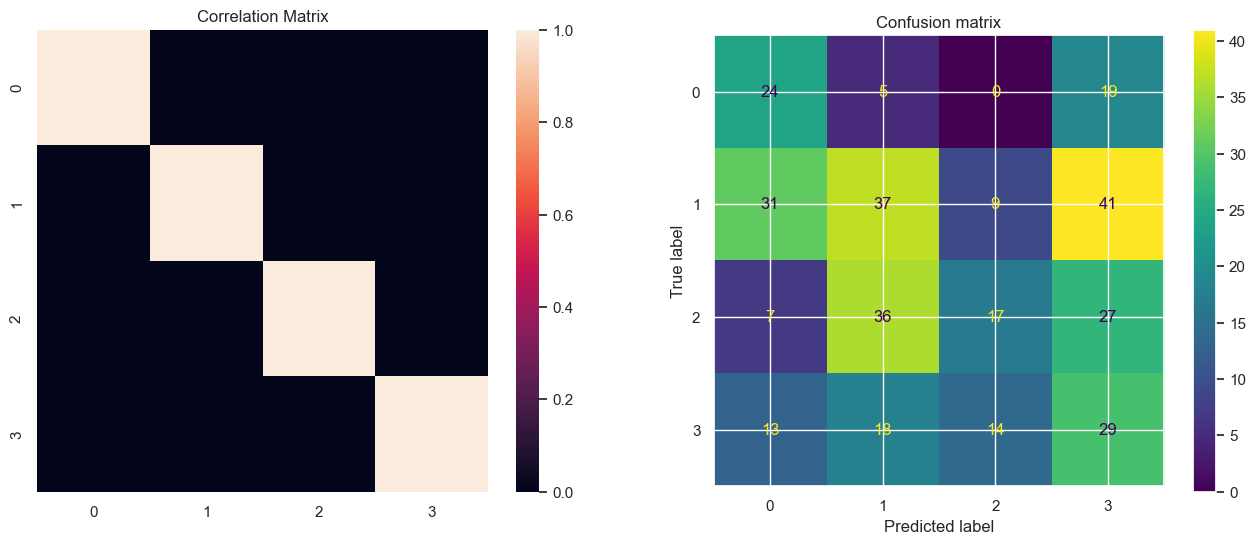

In [202]:
import seaborn as sns
params = [{
    'n_components':5,
    'n_init':10,
    'max_iter':1000,
},{
    'n_components':5,
    'n_init':100,
    'max_iter':2000,
},{
    'n_components':3,
    'n_init':500,
    'max_iter':5000,
},{
    'n_components':6,
    'n_init':100,
    'max_iter':3000,
},{
    'n_components':4,
    'n_init':100,
    'max_iter':3000,
},
]

def test(dt):
    for p in params:
        clf = AgeGroupPredictorKNN().with_params(p)
        clf.fit(dt['train'],dt['ytr'])
        pred = clf.predict(dt['test'])
        score = clf.score(dt['yte'],pred)
        cm = clf.confusion_matrix(dt['yte'],pred)
        print("================================================================")
        print("Parameters:",p, "Score:",score, "\nConfusion matrix:\n",cm)
        visualize_test(clf,cm)
        print("================================================================")



d = [{
    'train':X_train_m,
    'ytr':y_train_m_group,
    'test':X_test_m,
    'yte':y_test_m_group
},{
    'train':X_train_f,
    'ytr':y_train_f_group,
    'test':X_test_f,
    'yte':y_test_f_group
},
]
print("Prediction for males:")
test(d[0])
print("Prediction for females:")
test(d[1])

From the testing result, the best score is about 32% and 33% for male and female respectively. It seems that KNN is not a good choice. Try with another approach to directly comparing the similarity against the matrix after PCAed.

In [203]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
class AgeGroupPredictorSim:
    def __init__(self):
        self.n_components = 5
        self.max_iter = 10000
        self.n_init = 100


        self.pca = None
        self.X_pca = None
        self.label2group = []
    def with_params(self, params):
        if params == None:
            return self
        for k in params:
            match k:
                case 'n_components':
                    self.n_components = params[k]  
                case 'n_init':
                    self.n_init = params[k]
                case 'max_iter':
                    self.max_iter = params[k]                  
        return self

    def fit(self,X,y):
        self.pca = PCA(n_components=self.n_components).fit(X)
        self.X_pca = self.pca.transform(X)

        n_clusters = len(y.unique())
        self.knn = KMeans(
            n_clusters=n_clusters,  
            n_init=self.n_init,
            max_iter=self.max_iter,
        ).fit(self.X_pca)

        self.map_label_to_group(y)
        
    def map_label_to_group(self,y):
        self.label2group = y

    def predict(self, X):
        x_pca = self.pca.transform(X)
        sims = cosine_similarity(self.X_pca,x_pca)
        predicts = [self.label2group.iloc[i] for i in np.argmax(sims, axis = 0)]
        return pd.DataFrame(predicts)

    def score(self, y_true, y_predict):
        return accuracy_score(y_true, y_predict)

    def confusion_matrix(self, y_true, y_predict):
        return confusion_matrix(y_true, y_predict)

Prediction for males:
Parameters: {'n_components': 5, 'n_init': 10, 'max_iter': 1000} Score: 0.4816753926701571 
Confusion matrix:
 [[44 18  6  3]
 [27 76 23 16]
 [ 7 35 33 25]
 [ 0 25 13 31]]


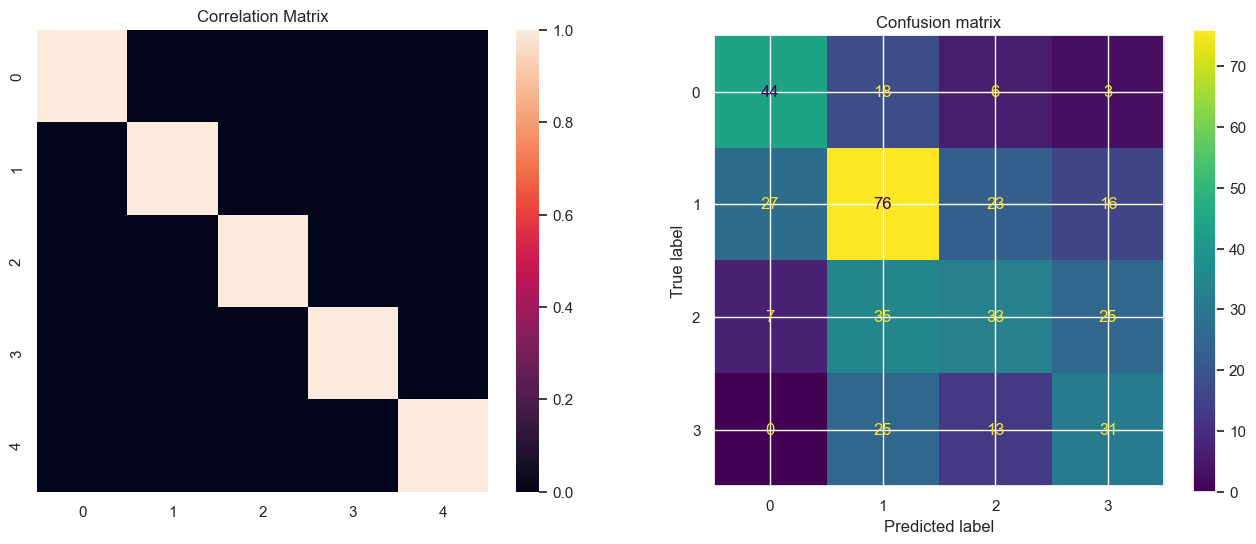

Parameters: {'n_components': 5, 'n_init': 100, 'max_iter': 2000} Score: 0.4816753926701571 
Confusion matrix:
 [[44 18  6  3]
 [27 76 23 16]
 [ 7 35 33 25]
 [ 0 25 13 31]]


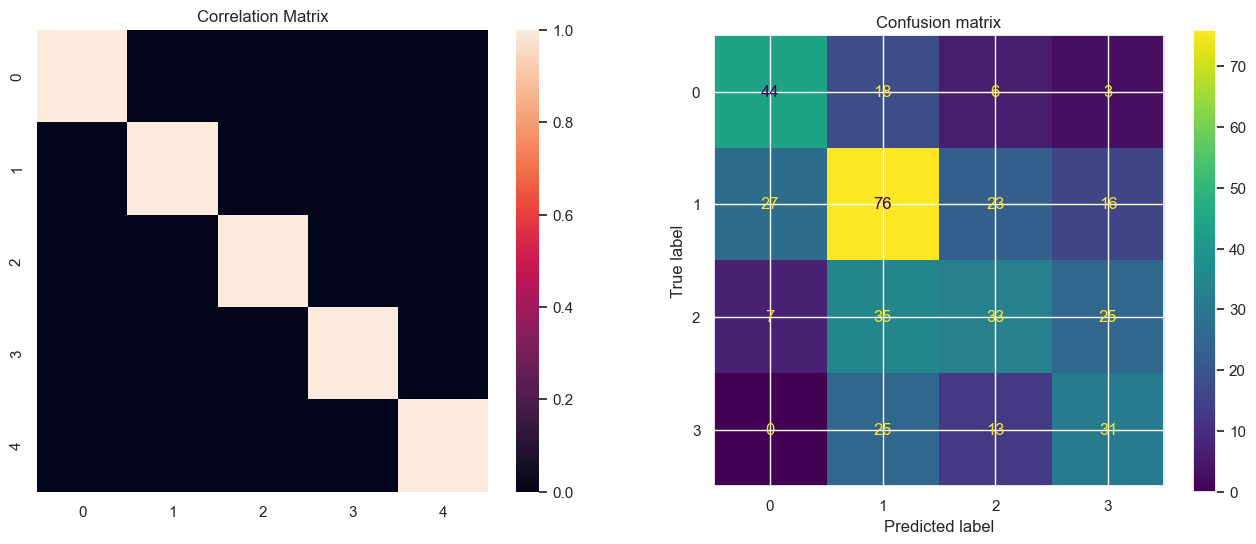

Parameters: {'n_components': 3, 'n_init': 500, 'max_iter': 5000} Score: 0.40575916230366493 
Confusion matrix:
 [[33 26  9  3]
 [30 66 31 15]
 [15 36 21 28]
 [ 1 16 17 35]]


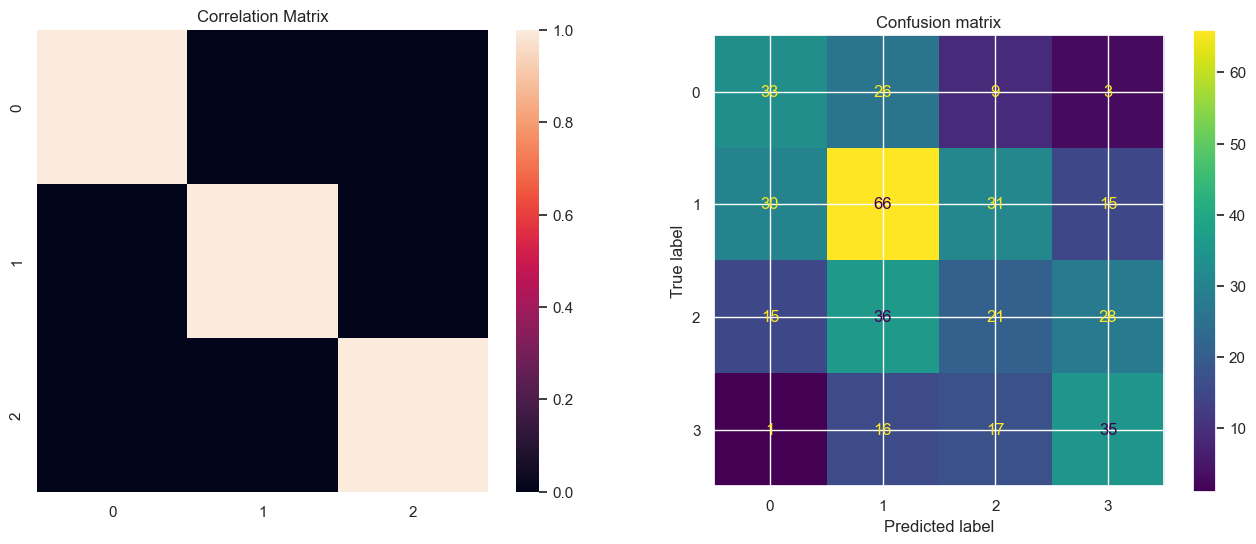

Parameters: {'n_components': 6, 'n_init': 100, 'max_iter': 3000} Score: 0.45549738219895286 
Confusion matrix:
 [[42 22  6  1]
 [30 69 26 17]
 [ 9 34 34 23]
 [ 2 23 15 29]]


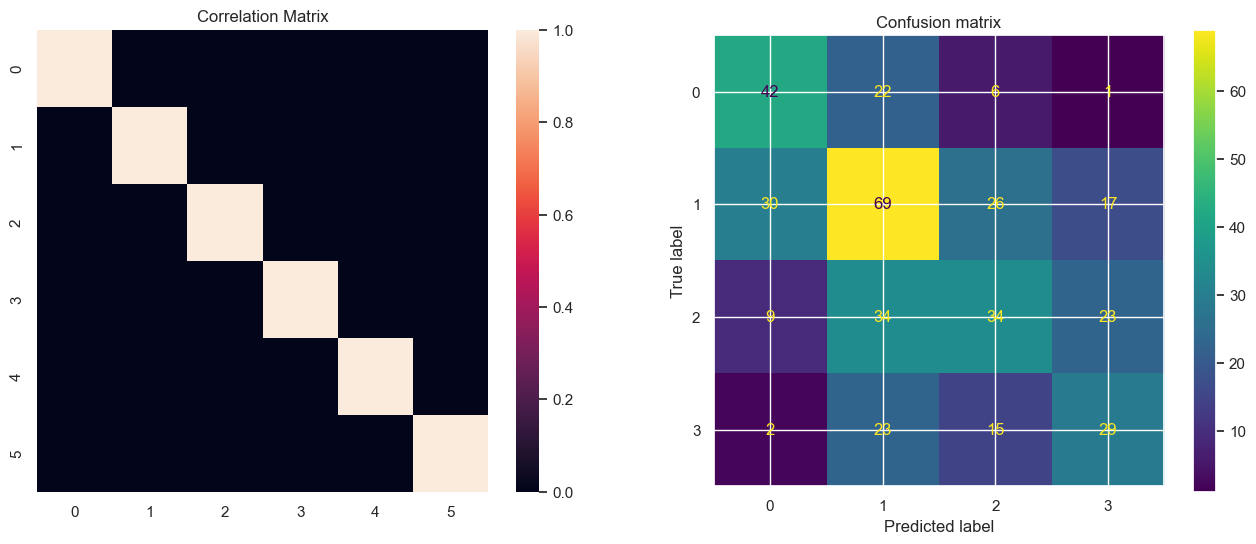

Parameters: {'n_components': 4, 'n_init': 100, 'max_iter': 3000} Score: 0.450261780104712 
Confusion matrix:
 [[43 21  6  1]
 [28 68 28 18]
 [ 7 36 29 28]
 [ 2 24 11 32]]


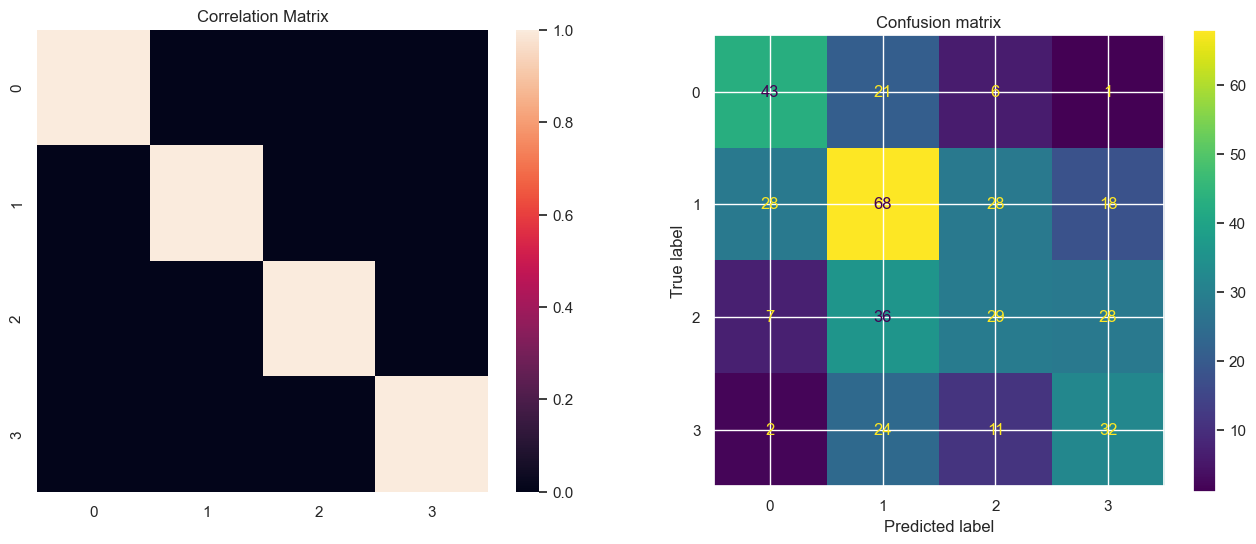

Prediction for females:
Parameters: {'n_components': 5, 'n_init': 10, 'max_iter': 1000} Score: 0.43119266055045874 
Confusion matrix:
 [[20 16  7  5]
 [19 50 31 18]
 [ 5 28 30 24]
 [ 5 13 15 41]]


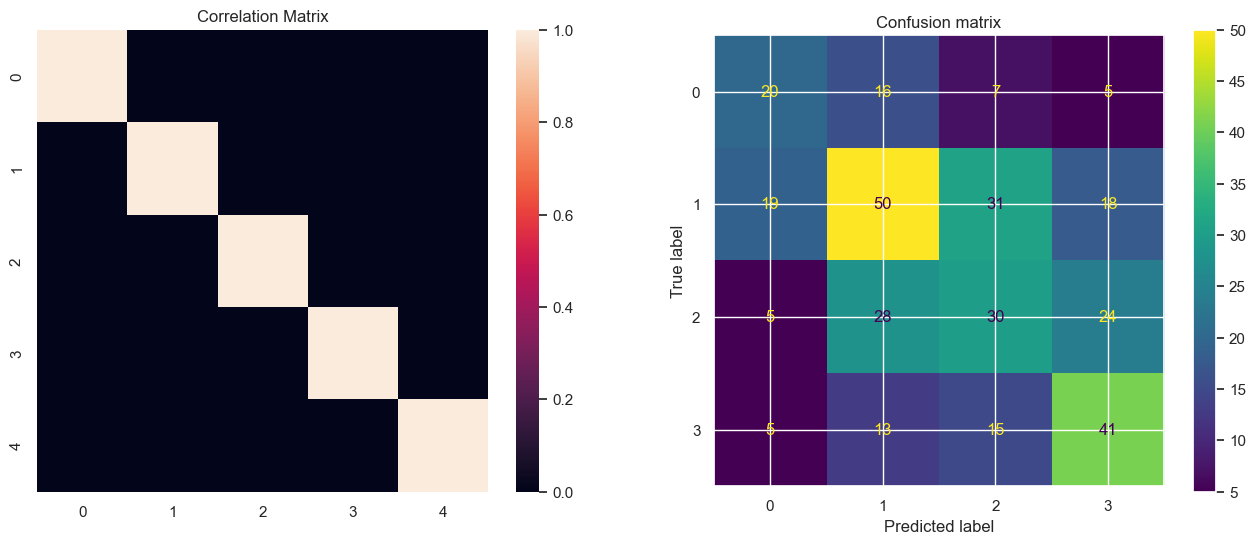

Parameters: {'n_components': 5, 'n_init': 100, 'max_iter': 2000} Score: 0.43119266055045874 
Confusion matrix:
 [[20 16  7  5]
 [19 50 31 18]
 [ 5 28 30 24]
 [ 5 13 15 41]]


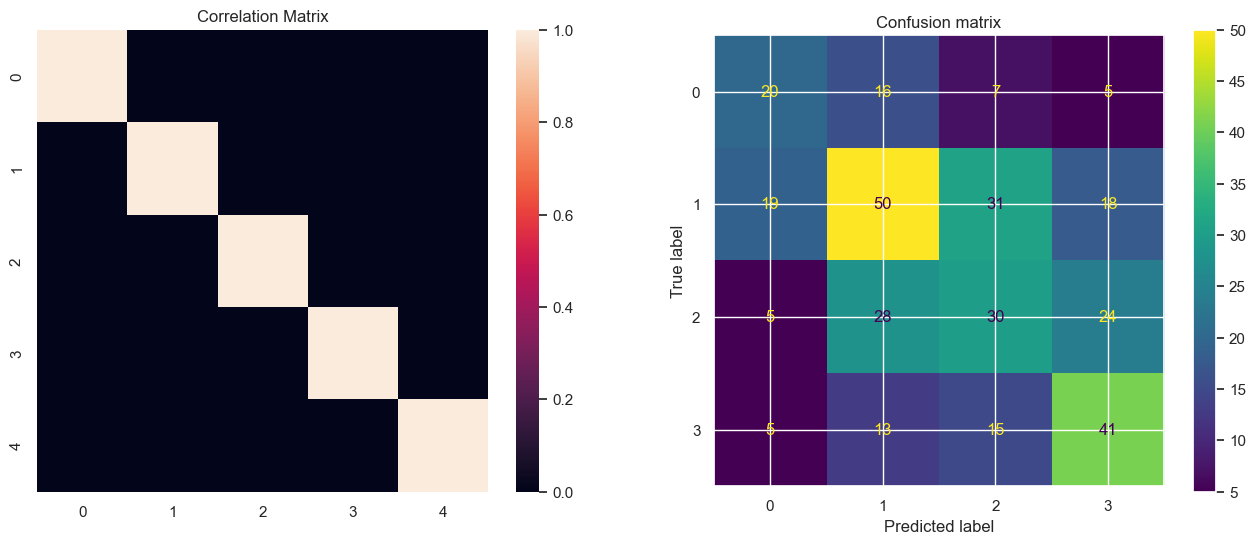

Parameters: {'n_components': 3, 'n_init': 500, 'max_iter': 5000} Score: 0.39143730886850153 
Confusion matrix:
 [[14 13 14  7]
 [22 41 27 28]
 [ 6 23 29 29]
 [ 6 11 13 44]]


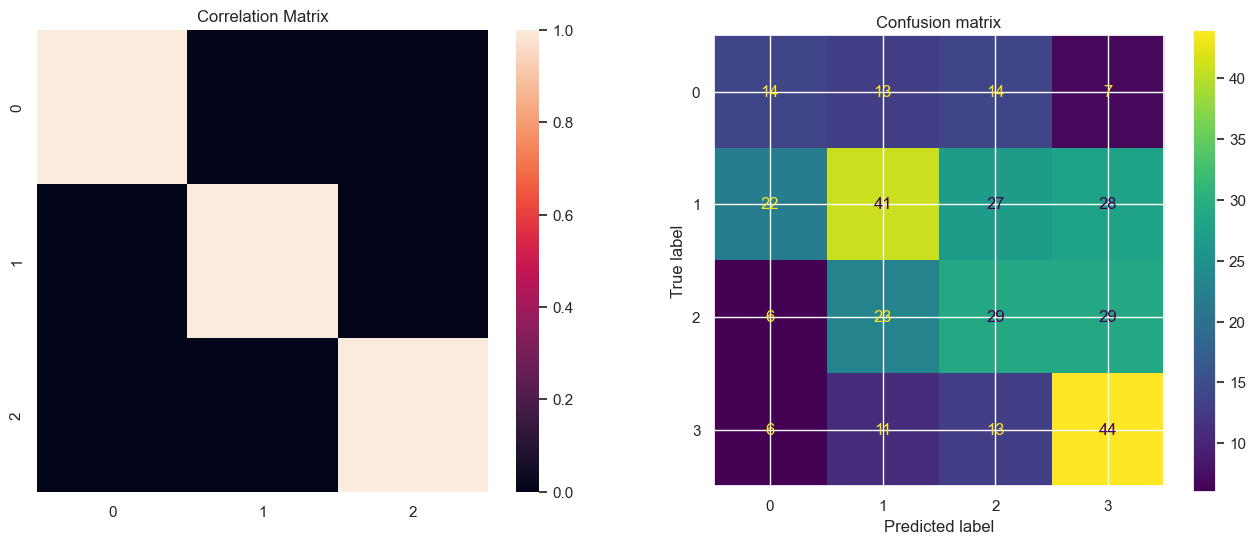

Parameters: {'n_components': 6, 'n_init': 100, 'max_iter': 3000} Score: 0.41590214067278286 
Confusion matrix:
 [[22 14  5  7]
 [17 45 39 17]
 [ 3 31 29 24]
 [ 5 11 18 40]]


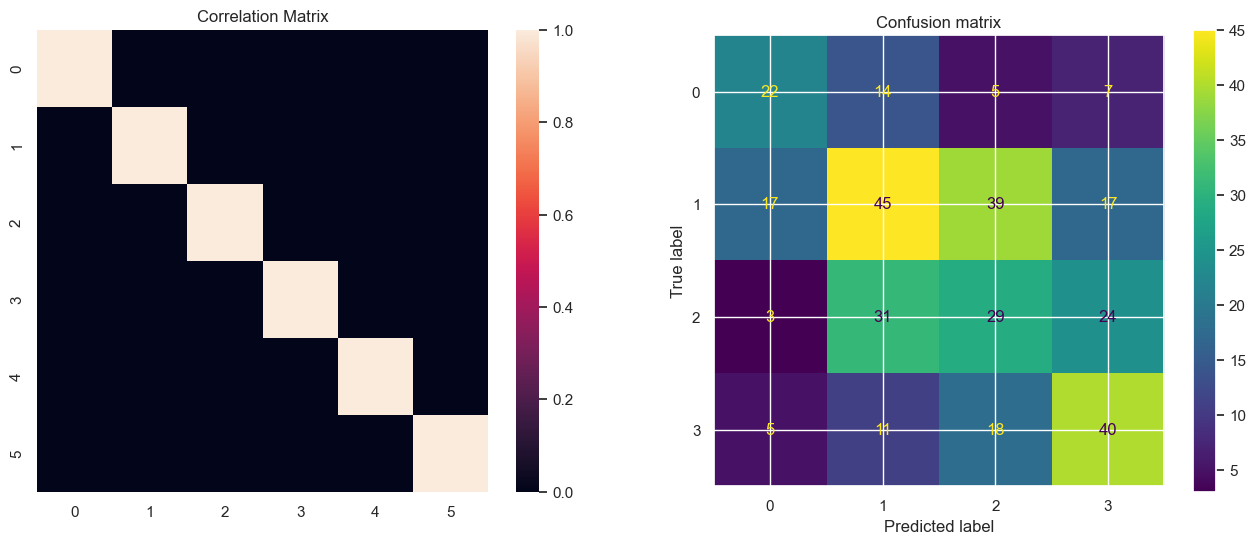

Parameters: {'n_components': 4, 'n_init': 100, 'max_iter': 3000} Score: 0.39755351681957185 
Confusion matrix:
 [[21 12  7  8]
 [17 51 26 24]
 [ 6 28 23 30]
 [ 4 17 18 35]]


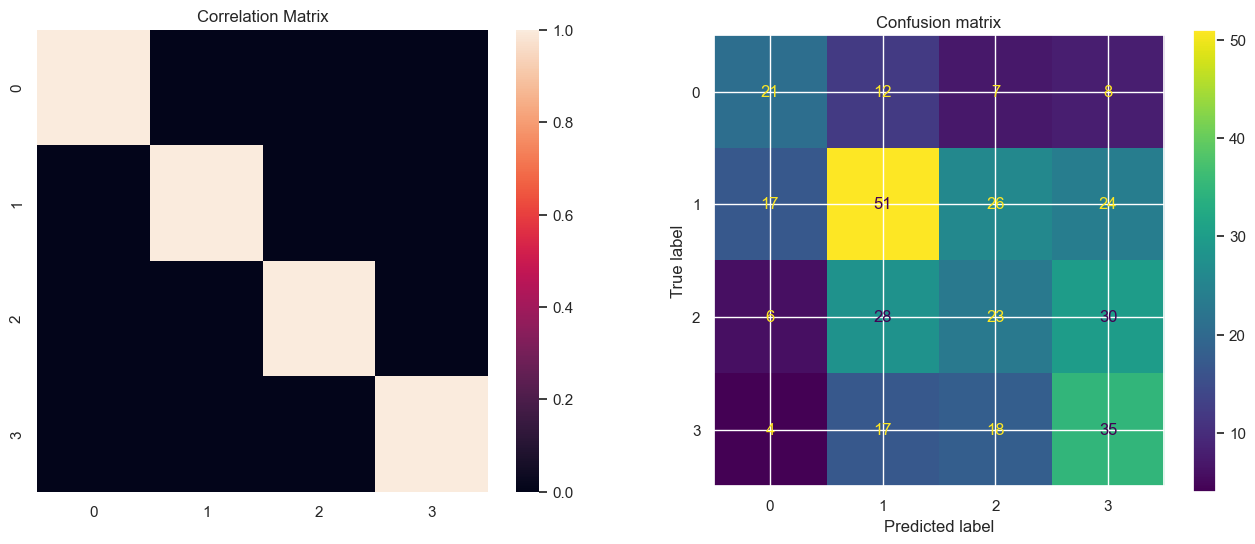

In [204]:
import seaborn as sns
params = [{
    'n_components':5,
    'n_init':10,
    'max_iter':1000,
},{
    'n_components':5,
    'n_init':100,
    'max_iter':2000,
},{
    'n_components':3,
    'n_init':500,
    'max_iter':5000,
},{
    'n_components':6,
    'n_init':100,
    'max_iter':3000,
},{
    'n_components':4,
    'n_init':100,
    'max_iter':3000,
},
]

def test(dt):
    for p in params:
        clf = AgeGroupPredictorSim().with_params(p)
        clf.fit(dt['train'],dt['ytr'])
        pred = clf.predict(dt['test'])
        score = clf.score(dt['yte'],pred)
        cm = clf.confusion_matrix(dt['yte'],pred)
        print("================================================================")
        print("Parameters:",p, "Score:",score, "\nConfusion matrix:\n",cm)
        visualize_test(clf,cm)
        print("================================================================")



d = [{
    'train':X_train_m,
    'ytr':y_train_m_group,
    'test':X_test_m,
    'yte':y_test_m_group
},{
    'train':X_train_f,
    'ytr':y_train_f_group,
    'test':X_test_f,
    'yte':y_test_f_group
},
]
print("Prediction for males:")
test(d[0])
print("Prediction for females:")
test(d[1])

With the new model which is similarity+PCA, the result improved. Now the best score for male increased to 46%, while female increased slightly to 35%.

## Conclusion

Although the best score is increased to 46% with similarity based solution, the overall result with different models and also several parameters is still not good enough.
Here are the possible reasons for the bad result:
* Data is insufficient.
* Biometrics is also not sufficient, esp. considering the correlation between the features are high.
* It is also possible that there is not any relationship between the measured biometrics and age.

To further verify whether it is possible to predict, more data is needed, and also it needs to be thought about to add more features.
